In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WDIData.csv')

In [4]:
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')


In [5]:
print('No. of rows, columns', data.shape)

No. of rows, columns (422400, 63)


In [6]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


In [7]:
central_govt_debt = data.loc[data['Indicator Name'] == 'Central government debt, total (% of GDP)', :]
military_exp = data.loc[data['Indicator Name'] == 'Military expenditure (% of GDP)']

In [8]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 63)
Shape of military_exp: (264, 63)


### Plotting Cross-Sectional Data

In [9]:
central_govt_debt['2010'].describe()

count     65.000000
mean      50.690490
std       32.003276
min        5.039028
25%       26.322981
50%       48.300908
75%       71.585324
max      162.296407
Name: 2010, dtype: float64

In [10]:
military_exp['2010'].describe()

count    194.000000
mean       1.966273
std        1.359961
min        0.000000
25%        1.122476
50%        1.578053
75%        2.597690
max        8.588373
Name: 2010, dtype: float64

In [19]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [20]:
central_govt_debt_2010 = central_govt_debt.loc[central_govt_debt['2010'].notnull(), '2010']
military_exp_2010 = military_exp['2010'][military_exp['2010'].notnull()]
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']
data_to_plot.head()

,central_govt_debt,military_exp
AFG,NaN,1.945837
AGO,NaN,4.177585
ALB,NaN,1.558592
ARB,NaN,5.119751
ARE,NaN,6.038592


In [21]:
data_to_plot.shape

(208, 2)

In [22]:
data_to_plot = data_to_plot[ (~data_to_plot['central_govt_debt'].isnull()) & (~data_to_plot['military_exp'].isnull())]

In [23]:
data_to_plot.shape

(51, 2)

In [24]:
data_to_plot.head()

,central_govt_debt,military_exp
AUS,29.305377,1.862400
AZE,6.385576,2.791004
BHR,30.306790,3.277759
BLR,18.905246,1.390233
BLZ,80.167899,1.097792


### Univariate Cross-Sectional Data on Military Expense

/home/aspiring1/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


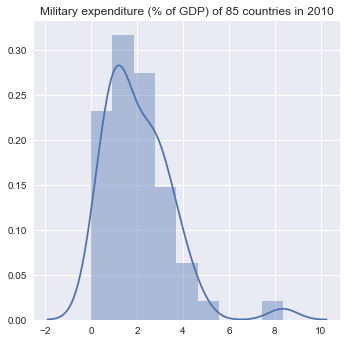

In [25]:
plt.figure(figsize = (5.5, 5.5))
g = sns.distplot(np.array(data_to_plot['military_exp']), norm_hist=False) #Can use both a 1-D array or a series 
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')

### Plotting bivariate plot

/home/aspiring1/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


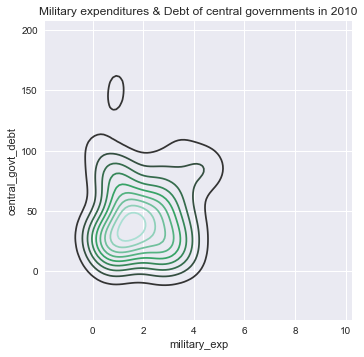

In [26]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp,data2=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')

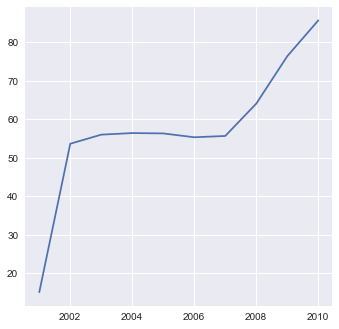

In [27]:
plt.figure(figsize= (5.5, 5.5))
g = plt.plot([str(x) for x in range(2001, 2011)],central_govt_debt.iloc[central_govt_debt.index.get_loc('USA'), central_govt_debt.columns.get_indexer([str(x) for x in range(2001, 2011)])])               

### Plotting Time Series Data

In [28]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [41]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis =1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1 + 1, :]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
data_us.head(10)

,Federal Military Expenditure,Debt of Federal Government
1960,8.61959,NaN
1961,8.77573,NaN
1962,8.94408,NaN
1963,8.46506,NaN
1964,7.71687,NaN
1965,7.20695,NaN
1966,8.07084,NaN
1967,9.06337,NaN
1968,8.87311,NaN
1969,8.27294,NaN


In [42]:
data_us.dropna(inplace = True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 2)


In [46]:
data_us.head(10)

,Federal Military Expenditure,Debt of Federal Government
1989,5.54685,39.017
1990,5.27832,40.8214
1991,4.57218,43.948
1992,4.66626,45.9165
1993,4.32694,48.1047
1994,3.94128,47.2141
1995,3.63847,47.0598
1996,3.35074,46.5855
1997,3.20991,43.9588
1998,3.01763,41.0099


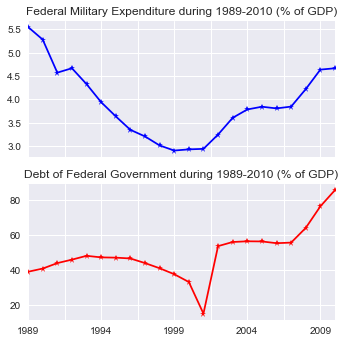

In [49]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1989-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1989-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

### Panel Data

In [67]:
chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)')& (data['Country Code']=='CHN'),data.columns[index0]: data.columns[index1 + 1]]
chn = pd.Series(chn.values[0], index = chn.columns)
chn.dropna(inplace = True)

In [69]:
usa = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='USA'),data.columns[index0]:data.columns[index1+1]
]
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)

In [71]:
ind = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='IND'),data.columns[index0]:data.columns[index1+1]
]
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)

In [73]:
gbr = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='GBR'),data.columns[index0]:data.columns[index1+1]
]
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)

In [84]:
ind = ind.loc['1989':]
usa = usa.loc['1989':]
gbr = gbr.loc['1989':]

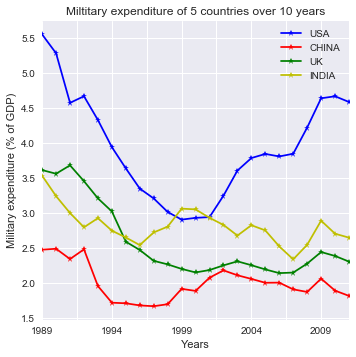

In [85]:
plt.figure(figsize=(5.5, 5.5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')